<a href="https://colab.research.google.com/github/nadienuncanada/BigData/blob/main/BigData_Practicas_MapReduce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# BigData 2024 - MapReduce

## Inicializacion

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
ruta = '/content/drive/MyDrive/BigData/MapReduce'
ruta_MRE = ruta + '/MRE.py'
GENERALinputPath= ruta + '/input'
outputPath = './output'

import os

# Definir el nombre de la carpeta

def crearcarpeta(carpeta):
  # Crear la carpeta si no existe
  if not os.path.exists(carpeta):
      os.makedirs(carpeta)
      print(f'Carpeta "{carpeta}" creada con éxito.')
  else:
      print(f'La carpeta "{carpeta}" ya existe.')

import sys
sys.path.append(ruta)

from MRE import Job

## Practica 2

### EJ3

Implemente un job MapReduce para calcular el máximo, mínimo, promedio y desvío
stándard de las ocurrencias de todas las palabras del dataset Libros.


In [ ]:
#Job 1: Cuenta reps por palabra

inputPath = GENERALinputPath + '/Libros'
crearcarpeta("output")

def fmap(key, value, context):
  words = value.split()
  for w in words:
   context.write(w,1)

def freduce(key,values,context):
  cont = 0
  for v in values:
    cont+=v
  context.write(key,cont)

job = Job(inputPath, outputPath, fmap, freduce)
job.setCombiner(freduce) # CONSULTAR: POR QUE CAMBIA EL RESULTADO? NO DEBERIA
job.waitForCompletion()

In [ ]:
# Job2: calcula el max, min y promedio
inputPath = outputPath
crearcarpeta("output2")
outputPath2 = './output2'
def fmap (key,value,context):
  context.write(1,value)

def freduce (key,values,context):
  max = -1
  min = 999
  sum = 0
  cont = 0
  for v in values:
    v=int(v)
    sum+=v
    cont+=1
    if(v>max):
      max = v
    if(v<min):
      min = v
  promedio=sum/cont
  context.write(key,[max, min, promedio])

job = Job(inputPath, outputPath2, fmap, freduce)
job.waitForCompletion()


In [ ]:
#Job 3: Calculo de desv estandar

crearcarpeta("output3")
outputPath3 = './output3'

with open('output2/output.txt', 'r', encoding='utf-8') as f:
  for linea in f:
    elems = linea.strip().split()
    promedio = float(elems[3])

inputPath = outputPath

def fmap(key, value, context):
  context.write(1,value)

def freduce(key,values,context):
  sum = 0
  cant_elems=0
  for v in values:
    cant_elems+=1
    v = float(v)
    sum+= (v-context["promedio"])**2

  desv = (sum/cant_elems)**0.5
  context.write(key,desv)

job = Job(inputPath, outputPath3, fmap, freduce)

params = {"promedio": promedio}
job.setParams(params)

job.waitForCompletion()

### EJ4
Utilice el dataset Libros para implementar una aplicación MapReduce que devuelva
como salida todos los párrafos que tienen una longitud mayor al promedio.

In [ ]:
#Job 1: Cuenta len por oracion

inputPath = GENERALinputPath + '/Libros'
crearcarpeta("output")

def fmap(key, value, context):
   context.write(value, value)

def freduce(key,values,context):
  for v in values:
    cont = 0
    words = v.split()
    for w in words:
      cont+=1
    context.write(cont,key)

job = Job(inputPath, outputPath, fmap, freduce)
#job.setCombiner(freduce) # CONSULTAR: POR QUE CAMBIA EL RESULTADO? NO DEBERIA
job.waitForCompletion()

La carpeta "output" ya existe.


True

In [ ]:
# Job2: calcula el promedio
inputPath = outputPath
crearcarpeta("output2")
outputPath2 = './output2'
def fmap (key,value,context):
  context.write(1,key)

def freduce (key,values,context):
  sum = 0
  cont = 0
  for v in values:
    v=int(v)
    sum+=v
    cont+=1
  promedio=sum/cont
  context.write(key, promedio)

job = Job(inputPath, outputPath2, fmap, freduce)
job.waitForCompletion()


La carpeta "output2" ya existe.


True

In [ ]:
#Job 3: Quedarme con mayores al prom

crearcarpeta("output3")
outputPath3 = './output3'

with open('output2/output.txt', 'r', encoding='utf-8') as f:
  for linea in f:
    elems = linea.strip().split()
    promedio = float(elems[1])

inputPath = outputPath

def fmap(key, value, context):
  if (float(key) > context["promedio"]):
    context.write(value, key)


def freduce(key,values,context):
  for v in values:
    context.write(v,key)

job = Job(inputPath, outputPath3, fmap, freduce)

params = {"promedio": promedio}
job.setParams(params)

job.waitForCompletion()

La carpeta "output3" ya existe.


True

## Practica 3

### EJ4
Implemente una solución MapReduce que permita calcular la mediana de una serie de
valores. Use como prueba el dataset website para calcular la mediana del tiempo de
permanencia.

In [ ]:
#Job 1: Cuenta la cant de elementos

inputPath = GENERALinputPath + '/website'
crearcarpeta("output")

def fmap(key, value, context):
  context.write(1, value[1])

def freduce(key,values,context):
  cont = 0
  for v in values:
    cont+=1
  context.write(key,cont)

job = Job(inputPath, outputPath, fmap, freduce)
#job.setCombiner(freduce) # CONSULTAR: POR QUE CAMBIA EL RESULTADO? NO DEBERIA
job.waitForCompletion()

La carpeta "output" ya existe.


True

In [ ]:
#Job 2: Obtiene la media

crearcarpeta("output2")
outputPath2 = './output2'

with open('output/output.txt', 'r', encoding='utf-8') as f:
  for linea in f:
    elems = linea.strip().split()
    posicion_de_la_media = int(float(elems[1]) / 2)
print(posicion_de_la_media)

inputPath = GENERALinputPath + '/website'

def fmap(key, value, context):
  elems = value.split()
  context.write(elems[1], elems[1])

def freduce(key,values,context):
  cont = 0
  for v in values:
    cont+=1
    context.write(v, "")
    if(cont == context["posicion_de_la_media"]):
      media = v
  context.write(media,1111111111111111)

def fShuffleCmp(aKey, anotherKey):
  return 0

def fSortCmp(aKey, anotherKey):
 if(int(aKey) == int(anotherKey)):
  return 0
 elif(int(aKey) < int(anotherKey)):
  return -1
 else:
  return 1

job = Job(inputPath, outputPath2, fmap, freduce)

job.setSortCmp(fSortCmp)
job.setShuffleCmp(fShuffleCmp)

params = {"posicion_de_la_media": posicion_de_la_media}
job.setParams(params)

job.waitForCompletion()

La carpeta "output2" ya existe.
2949


True

### EJ7
Implemente una solución MapReduce para resolver las siguientes consultas SQL
describiendo el DAG correspondiente.

#### EJ7)A)
A)
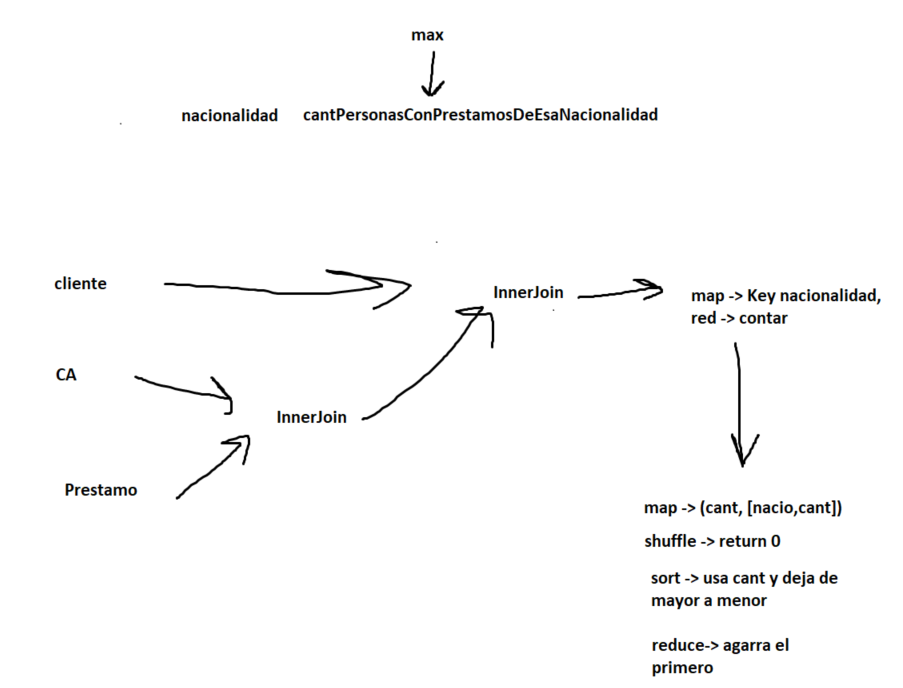


In [ ]:
#Job 1: InnerJoin entre CA y P

inputPath = GENERALinputPath + '/Banco'
inputPathCA = inputPath + '/CajasDeAhorro'
inputPathP = inputPath + '/Prestamos'

crearcarpeta("output")

def fmapCA(key, value, context):
  context.write(key, ("CA", value))

def fmapP(key, value, context):
  context.write(key, ("P", value))

def freduce(key,values,context):
  cont = 0
  p = None
  for v in values:
    if (v[0] == "CA"):
      ca = v[1].split()
    else:
      p = v[1]
  if (p != None):
    context.write(ca[0], " ") #+ " " + p)



job = Job(inputPathCA, outputPath, fmapCA, freduce)
job.addInputPath(inputPathP, fmapP)
#job.setCombiner(freduce) # CONSULTAR: POR QUE CAMBIA EL RESULTADO? NO DEBERIA
job.waitForCompletion()

La carpeta "output" ya existe.


True

In [ ]:
#Job 2: InnerJoin con cliente

inputPathCAP = outputPath
inputPathC = inputPath + '/Clientes'
outputPath2 = './output2'
crearcarpeta("output2")

def fmapCAP(key, value, context):
  context.write(("CAP", key), ("CAP", key))

def fmapC(key, value, context):
  context.write(("C", key), ("C", value))

def freduce(key,values,context):
  cont = 0
  p = None
  for v in values:
    if (v[0] == "C"):
      CLI = v[1].split()
    else:
      context.write(CLI[4], "")


def fShuffleCmp(aKey, anotherKey):
 if(aKey[1] == anotherKey[1]):
  return 0
 elif(aKey[1] < anotherKey[1]):
  return -1
 else:
  return 1

def fSortCmp(aKey, anotherKey):
 if(aKey[0] == anotherKey[0]):
  return 0
 elif(aKey[0] == "C"):
  return -1
 else:
  return 1




job = Job(inputPathCAP, outputPath2, fmapCAP, freduce)
job.addInputPath(inputPathC, fmapC)


job.setSortCmp(fSortCmp)
job.setShuffleCmp(fShuffleCmp)
#job.setCombiner(freduce) # CONSULTAR: POR QUE CAMBIA EL RESULTADO? NO DEBERIA
job.waitForCompletion()

La carpeta "output2" ya existe.


True

In [ ]:
#Job 3: Cuenta la cant de repeticiones de nacionalidades

inputPathNA = outputPath2
outputPath3 = './output3'
crearcarpeta("output3")

def fmapNA(key, value, context):
  context.write(key, 1)

def freduce(key,values,context):
  cont = 0
  for v in values:
    cont+=1
  context.write(key,cont)

job = Job(inputPathNA, outputPath3, fmapNA, freduce)
#job.setCombiner(freduce) # CONSULTAR: POR QUE CAMBIA EL RESULTADO? NO DEBERIA
job.waitForCompletion()

Carpeta "output3" creada con éxito.


True

In [ ]:
#Job 4: Obtiene la media O COMO NO ES BIG DATA -> script de python

# Definir el nombre del archivo
archivo = './output3/output.txt'

# Inicializar variables para guardar el país con el mayor valor
pais_max = ""
max_valor = float('-inf')

# Leer el archivo
with open(archivo, 'r', encoding='utf-8') as f:
    for linea in f:
        # Dividir la línea en país y valor
        pais, valor = linea.strip().split('\t')
        valor = int(valor)

        # Comprobar si es el valor máximo
        if valor > max_valor:
            max_valor = valor
            pais_max = pais

# Imprimir el resultado
print(f'El país con el mayor valor es {pais_max} con {max_valor}.')


El país con el mayor valor es ECU con 238.


#### EJ7)B)
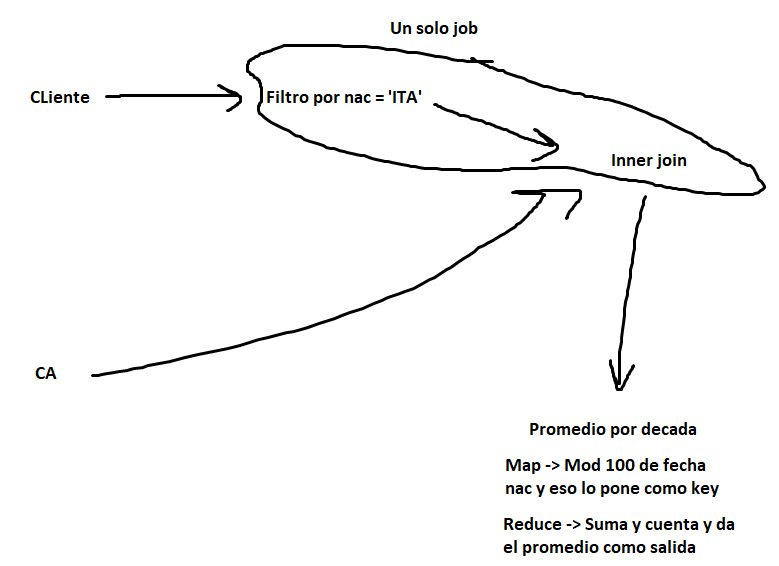

In [ ]:
#Job 2: InnerJoin con cliente

inputPath = GENERALinputPath + '/Banco'
inputPathCA = inputPath + '/CajasDeAhorro'
inputPathC = inputPath + '/Clientes'

outputPath = './output'
crearcarpeta("output")

nacionalidad_buscada = "ITA"

def fmapCA(key, value, context):
  datos = value.split()
  context.write(("CA", datos[0]), ("CA", datos[1]))

def fmapC(key, value, context):
  datos = value.split()
  if (datos[4] == context["nacionalidad_buscada"]):
    context.write(("C", key), ("C", datos[3]))

def freduce(key,values,context):
  fechaDeNacimiento = None
  for v in values:
    if (v[0] == "C"):
      fechaDeNacimiento = v[1]
    else:
      if (fechaDeNacimiento == None):
        break
      context.write(fechaDeNacimiento, v[1])


def fShuffleCmp(aKey, anotherKey):
 if(aKey[1] == anotherKey[1]):
  return 0
 elif(aKey[1] < anotherKey[1]):
  return -1
 else:
  return 1

def fSortCmp(aKey, anotherKey):
 if(aKey[0] == anotherKey[0]):
  return 0
 elif(aKey[0] == "C"):
  return -1
 else:
  return 1


job = Job(inputPathCA, outputPath, fmapCA, freduce)
job.addInputPath(inputPathC, fmapC)

params = {"nacionalidad_buscada": nacionalidad_buscada}
job.setParams(params)

job.setShuffleCmp(fShuffleCmp)
job.setSortCmp(fSortCmp)
#job.setCombiner(freduce) # CONSULTAR: POR QUE CAMBIA EL RESULTADO? NO DEBERIA
job.waitForCompletion()

In [ ]:
#Job 2 promedio por decada, apartir de los clientes ya filtrados por nacionalidad "ITA"
inputPath = outputPath

outputPath2 = './output2'
crearcarpeta("output2")


def fmap(key, value, context):
  decada=key.split("-")
  decada=int(decada[0])%100
  context.write(decada, value)#decada y el salario.

def freduce(key, value, context):
  sum=0
  cont=0
  for v in value:
    cont+=1
    sum+=float(v)
  prom=sum/cont
  context.write(key,prom)

job = Job(inputPath, outputPath2, fmap, freduce)
job.waitForCompletion()

La carpeta "output2" ya existe.


True

#### EJ7) C)

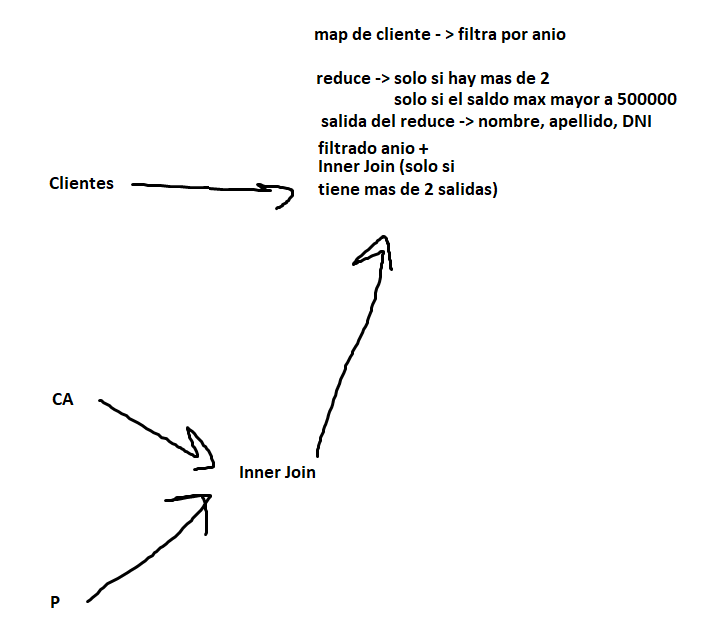

In [ ]:
#Job 1: InnerJoin entre CA y P

inputPath = GENERALinputPath + '/Banco'
inputPathCA = inputPath + '/CajasDeAhorro'
inputPathP = inputPath + '/Prestamos'

crearcarpeta("output")
outputPath = "./output"

def fmapCA(key, value, context):
  datos = value.split()
  context.write(key, ("CA", datos[0], datos[1]))

def fmapP(key, value, context):
  context.write(key, ("P", ""))

def freduce(key,values,context):
  cont = 0
  p = None
  for v in values:
    if (v[0] == "CA"):
      soy_caja, id_cli, saldo = v
    else:
      p = v[1]
  if (p != None):
    context.write(id_cli, saldo)

job = Job(inputPathCA, outputPath, fmapCA, freduce)
job.addInputPath(inputPathP, fmapP)
#job.setCombiner(freduce) # CONSULTAR: POR QUE CAMBIA EL RESULTADO? NO DEBERIA
job.waitForCompletion()

In [ ]:
#Job 2 - filtrar cliente por anio, reduce solo si esta mas de 2 veces repetido el cliente y que el maximo de alguno de sus saldos sea mayor a 50000
inputPathOut = outputPath #de donde vienen los datos del anterior job

inputPath = GENERALinputPath + '/Banco'
inputPathC = inputPath + '/Clientes'

outputPath2 = './output2'
crearcarpeta("output2")


def fmapC(key, value, context):
  datos = value.split()
  fecha_de_nacimiento = datos[3].split("-")
  if (int(fecha_de_nacimiento[0]) < 2000 ):
    context.write(("C", key), ("C", datos[0], datos[1] , datos[2]))

def fmapInput(key, value, context):
  context.write(("CA", key), ("CA", value))
# key=id cliente, value = saldo de la ca.

def fShuffleCmp(aKey, anotherKey):
 if(aKey[1] == anotherKey[1]):
  return 0
 elif(aKey[1] < anotherKey[1]):
  return -1
 else:
  return 1

def fSortCmp(aKey, anotherKey):
 if(aKey[0] == anotherKey[0]):
  return 0
 elif(aKey[0] == "C"):
  return -1
 else:
  return 1

def freduce(key, value, context):
  max=-1
  cont=0
  nombre = None
  for v in value:
    if (v[0] == "C"):
      soyCLiente, nombre, apellido, dni = v
    else:
      saldo=float(v[1])
      cont+=1
      if(max < saldo):
        max= saldo
  if nombre is not None and cont >= 2 and max > 50000:
    context.write(dni, nombre + " " + apellido + " " + str(cont) + " " + str(max))

job = Job(inputPathC, outputPath2, fmapC, freduce)
job.addInputPath(inputPathOut, fmapInput)

job.setShuffleCmp(fShuffleCmp)
job.setSortCmp(fSortCmp)
job.waitForCompletion()